In [ ]:
import tensorflow as tf
a = tf.nn.relu(tf.matmul(x,w1) + biases1)
y = tf.nn.relu(tf.matmul(a,w2) + biases2)

In [5]:
# reduce_mean用法
import tensorflow as tf
v = tf.constant([[1.0, 2.0, 3.0],
                [4.0, 5.0, 6.0]])
with tf.Session() as sess:
    print(tf.reduce_mean(v).eval())

3.5


### 预测离散值的损失函数

In [ ]:
# softmax之后计算交叉熵
# y_代表正确结果，y代表预测结果
cross_entropy = - tf.reduce_mean(
    y_ * tf.log(tf.clip_by_value(y, 1e-10, 1.0)))

# softmax + 交叉熵，统一封装
corss_entropy = tf.nn.softmax_cross_entropy_with_logits(
    labels = y_, logits = y)


### 预测连续值的损失函数

In [ ]:
# 均方误差 MSE
mse = tf.reduce_mean(tf.square(y_ - y))

### 自定义损失函数

In [ ]:
# v1大于v2，损失函数为(v1-v2)*a
# v1小于v2，损失函数为(v2-v1)*b
loss = tf.reduce_sum(tf.where(tf.greater(v1, v2),
                            (v1-v2)*a, (v2-v1)*b))

In [10]:
v1 = tf.constant([1.0, 2.0, 3.0, 4.0])
v2 = tf.constant([4.0, 3.0, 2.0, 1.0])

sess = tf.InteractiveSession()
print(tf.greater(v1, v2).eval()) # 比较v1,v2哪个值大，v1大于v2，返回true，v1小于v2，返回false。

print(tf.where(tf.greater(v1, v2), v1, v2).eval())     # tf.where(condition, x, y)根据condition返回x或者y,true返回x,false返回y。

sess.close()

[False False  True  True]
[4. 3. 3. 4.]


/home/wujiaocan/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### 损失函数对模型训练结果的影响

In [36]:
'''
    自定义损失函数
'''
import tensorflow as tf
from numpy.random import RandomState

batch_size = 8

# 两个输入节点
x = tf.placeholder(tf.float32, shape=(None,2), name="x-input")
# 回归问题一般只有一个输出节点
y_ = tf.placeholder(tf.float32, shape=(None,1), name="y-input")

# 单层神经网络向前传播，简单的加权和
w1 = tf.Variable(tf.random_normal([2,1], stddev=1, seed=1))
y = tf.matmul(x,w1)


loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y-y_)*loss_more, (y_-y)*loss_less))
train_step = tf.train.AdamOptimizer(0.001).minimize(loss;)

# 通过一个随机数生成一个模拟数据集
rdm = RandomState(1)
dataset_size = 128
X = rdm.rand(dataset_size, 2)
Y = [[x1 + x2 + rdm.rand()/10.0-0.05] for x1, x2 in X]   # 加上一个随机的噪声，-0.05~0.05的随机数


In [37]:
# 定义预测多了和预测少了的成本
loss_less = 10
loss_more = 1

# 训练神经网络
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    STEPS = 5000
    for i in range(STEPS):
        start = (i*batch_size) % 128
        end = (i*batch_size) % 128 + batch_size
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 1000 == 0:
            print("after %d training steps, the w1 is:" % (i))
            print(sess.run(w1))
    print("the final w1 is: \n", sess.run(w1))

after 0 training steps, the w1 is:
[[-0.81031823]
 [ 1.4855988 ]]
after 1000 training steps, the w1 is:
[[0.01247112]
 [2.1385448 ]]
after 2000 training steps, the w1 is:
[[0.45567414]
 [2.1706066 ]]
after 3000 training steps, the w1 is:
[[0.69968724]
 [1.8465308 ]]
after 4000 training steps, the w1 is:
[[0.89886665]
 [1.2973602 ]]
the final w1 is: 
 [[1.019347 ]
 [1.0428089]]


In [26]:
# 产生 -0.05 ~ 0.05 的随机数
rdm.rand()                # [0, 1]
rdm.rand() / 10.0         # [0, 0.1]
rdm.rand() / 10.0 - 0.05  # [-0.05, 0.05]

0.14085955030930958

In [38]:
'''
    重新定义损失函数，使得预测多了的损失大，于是模型应该偏向少的方向预测
'''
loss_less = 1
loss_more = 10
loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * loss_more, (y_ - y) * loss_less))
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 5000
    for i in range(STEPS):
        start = (i*batch_size) % 128
        end = (i*batch_size) % 128 + batch_size
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 1000 == 0:
            print("After %d training step(s), w1 is: " % (i))
            print(sess.run(w1), "\n")
    print("Final w1 is: \n", sess.run(w1))


After 0 training step(s), w1 is: 
[[-0.8123182]
 [ 1.4835987]] 

After 1000 training step(s), w1 is: 
[[0.18643527]
 [1.0739334 ]] 

After 2000 training step(s), w1 is: 
[[0.95444274]
 [0.98088616]] 

After 3000 training step(s), w1 is: 
[[0.9557403]
 [0.9806633]] 

After 4000 training step(s), w1 is: 
[[0.9546602 ]
 [0.98135227]] 

Final w1 is: 
 [[0.9552581]
 [0.9813394]]


In [39]:
'''
    定义损失函数为MSE。
'''

loss = tf.losses.mean_squared_error(y, y_)
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 5000
    for i in range(STEPS):
        start = (i*batch_size) % 128
        end = (i*batch_size) % 128 + batch_size
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 1000 == 0:
            print("After %d training step(s), w1 is: " % (i))
            print(sess.run(w1), "\n")
    print("Final w1 is: \n", sess.run(w1))

After 0 training step(s), w1 is: 
[[-0.81031823]
 [ 1.4855988 ]] 

After 1000 training step(s), w1 is: 
[[-0.13337609]
 [ 1.8130922 ]] 

After 2000 training step(s), w1 is: 
[[0.321903 ]
 [1.5246348]] 

After 3000 training step(s), w1 is: 
[[0.67850214]
 [1.2529727 ]] 

After 4000 training step(s), w1 is: 
[[0.89474  ]
 [1.0859823]] 

Final w1 is: 
 [[0.9743756]
 [1.0243336]]


### 过拟合问题

In [ ]:
w = tf.Variable(tf.random_normal([2,1], stddev=1, seed=1))
y = tf.matmul(x, w)

loss = tf.reduce_mean(tf.square(y_ - y)) + tf.contrib,layers.l2_regularizer(lambda)(w)


In [40]:
weights = tf.constant([[1.0, -2.0], [-3.0, 4.0]])
with tf.Session() as sess:
    print(sess.run(tf.contrib.layers.l1_regularizer(.5)(weights)))

5.0


ValueError: c of shape (150, 1) not acceptable as a color sequence for x with size 150, y with size 150

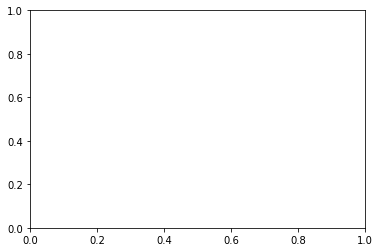

In [64]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data = []
label = []
np.random.seed(0)

# 以原点为圆心，半径为1的圆把散点划分成红蓝两部分，并加入随机噪音。
for i in range(150):
    x1 = np.random.uniform(-1,1)
    x2 = np.random.uniform(0,2)
    if x1**2 + x2**2 <= 1:
        data.append([np.random.normal(x1, 0.1),np.random.normal(x2,0.1)])
        label.append(0)
    else:
        data.append([np.random.normal(x1, 0.1), np.random.normal(x2, 0.1)])
        label.append(1)
        
data = np.hstack(data).reshape(-1,2)
label = np.hstack(label).reshape(-1, 1)
plt.scatter(data[:,0], data[:,1], c=label,
           cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
plt.show()

In [60]:
data

[[-0.21877316582119757, 1.3333521246686992],
 [-0.03198387511701212, 1.0015127779172035],
 [-0.4448847068324677, 1.5502208018321255],
 [-0.6058491785759887, 0.2862138514383545],
 [0.735535483837033, 1.7014274852155575],
 [0.8057171425797117, 1.1808029409299956],
 [0.4630874502896085, 1.6008785578773126],
 [-0.8203367948073176, 0.9488225990256289],
 [-0.49316659283926245, 0.17553658008668338],
 [-0.1285847163028512, 0.13016666001587],
 [0.159427518570407, 1.3107538236333787],
 [0.3938810909330931, 0.7646589743968699],
 [0.33960518568774056, 1.091498535087359],
 [0.8368208625713497, 0.23972442364312319],
 [-0.22553574936641066, 0.38937071335208534],
 [0.5301829387977369, 1.5405100871279758],
 [0.5531778500964752, 0.6679874004454135],
 [-0.03065468151226748, 2.081661775938991],
 [-0.5519505134399335, 1.7593288838653287],
 [-0.16772268753265462, 0.5616708525976779],
 [-0.9626958512135215, 1.0320697056590475],
 [0.7948936721579873, 0.790740638036202],
 [-0.9905903285679234, 1.83879866059452

In [61]:
label

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0]

In [54]:
x2

0.36322570266152754